In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import re

In [2]:
matplotlib.rcParams.update({'font.size': 11})

In [3]:
def trend_plot(df, x, y):
    if x == 'l':
        d = df['Apex separation (mm)'].unique()
        n = np.shape(d)[0]
        fig, ax = plt.subplots(n, 1, figsize = (4, 3 * n))
        for i in range(n):
            df_process = df[df['Apex separation (mm)'] == d[i]]
            ax[i].plot(df_process['Flexure length (mm)'], df_process[y], 'r.')
            ax[i].set_xlabel('Flexure length (mm)')
            ax[i].set_ylabel(y)
            ax[i].set_title('D = {:.1f}'.format(d[i]))
    elif x == 'd':
        l = df['Flexure length (mm)'].unique()
        n = np.shape(l)[0]
        fig, ax = plt.subplots(n, 1, figsize = (4, 3 * n))
        for i in range(n):
            df_process = df[df['Flexure length (mm)'] == l[i]]
            ax[i].plot(df_process['Apex separation (mm)'], df_process[y], 'r.')
            ax[i].set_xlabel('Apex separation (mm)')
            ax[i].set_ylabel(y)
            ax[i].set_title('L = {:.1f}'.format(l[i]))
    plt.tight_layout()
    plt.show()

## First order bending

In [4]:
df1 = pd.read_csv(r'..\Final_data\First_order_bending\dogbone_filleted_first_order_bending_displacement_final.csv', header = None, skiprows = 9)
column_name = pd.read_csv('..\Final_data\First_order_bending\dogbone_filleted_first_order_bending_displacement_final.csv', header = None, nrows = 1, skiprows = 8)
column_name = np.squeeze(column_name.values)
new_column_name = ['X (mm)', 'Y (mm)', 'Z (mm)']
for i in range(3, np.shape(column_name)[0], 3):
    new_column_name.append(','.join(column_name[i:i+3]))
df1.columns = new_column_name
df1 = df1.round({'X (mm)': 1, 'Y (mm)': 1, 'Z (mm)': 1})
df1.sort_values(by = ['X (mm)', 'Y (mm)', 'Z (mm)'], inplace = True)
df1.reset_index(drop = True, inplace = True)
df1

X (mm)  Y (mm)  Z (mm)  w (mm) @ L1=1.3, d1=0.2, F1=1  \
0          0.0     0.0     0.0                   3.163116e-21   
1          0.0     0.0     0.1                   0.000000e+00   
2          0.0     0.0     0.2                   0.000000e+00   
3          0.0     0.0     0.3                   0.000000e+00   
4          0.0     0.0     0.4                   0.000000e+00   
...        ...     ...     ...                            ...   
169735    41.3     4.0     0.5                  -1.544849e+00   
169736    41.3     4.0     0.6                  -1.544814e+00   
169737    41.3     4.0     0.7                  -1.544781e+00   
169738    41.3     4.0     0.8                  -1.544753e+00   
169739    41.3     4.0     0.9                  -1.544734e+00   

        w (mm) @ L1=1.3, d1=0.4, F1=1  w (mm) @ L1=1.3, d1=0.6, F1=1  \
0                            0.000000                       0.000000   
1                            0.000000                       0.000000   
2                            0.000000                       0.000000   
3                            0.000000                       0.000000   
4                            0.000000                       0.000000   
...                               ...                            ...   
169735                      -1.503526                      -1.466705   
169736                      -1.503490                      -1.466669   
169737                      -1.503459                      -1.466639   
169738                      -1.503434                      -1.466614   
169739                      -1.503414                      -1.466594   

        w (mm) @ L1=1.3, d1=0.8, F1=1  w (mm) @ L1=1.3, d1=1, F1=1  \
0                            0.000000                 1.442213e-20   
1                            0.000000                 0.000000e+00   
2                            0.000000                 0.000000e+00   
3                            0.000000                 0.000000e+00   
4                            0.000000                 0.000000e+00   
...                               ...                          ...   
169735                      -1.432888                -1.401522e+00   
169736                      -1.432851                -1.401485e+00   
169737                      -1.432820                -1.401453e+00   
169738                      -1.432794                -1.401427e+00   
169739                      -1.432776                -1.401408e+00   

        w (mm) @ L1=1.3, d1=1.2, F1=1  w (mm) @ L1=1.3, d1=1.4, F1=1  ...  \
0                       -7.030609e-21                       0.000000  ...   
1                        0.000000e+00                       0.000000  ...   
2                        0.000000e+00                       0.000000  ...   
3                        0.000000e+00                       0.000000  ...   
4                        0.000000e+00                       0.000000  ...   
...                               ...                            ...  ...   
169735                  -1.372284e+00                      -1.344906  ...   
169736                  -1.372249e+00                      -1.344870  ...   
169737                  -1.372216e+00                      -1.344839  ...   
169738                  -1.372188e+00                      -1.344814  ...   
169739                  -1.372169e+00                      -1.344794  ...   

        w (mm) @ L1=2.3, d1=1.8, F1=0.98  w (mm) @ L1=2.3, d1=2, F1=0.98  \
0                           3.664317e-21                    3.655843e-21   
1                           0.000000e+00                    0.000000e+00   
2                           0.000000e+00                    0.000000e+00   
3                           0.000000e+00                    0.000000e+00   
4                           0.000000e+00                    0.000000e+00   
...                                  ...                             ...   
169735                     -1.789842e+00                   -1.75

In [5]:
df2 = pd.read_csv(r'..\Final_data\First_order_bending\dogbone_filleted_first_order_bending_stress_final.csv', skiprows = 4)
df2.rename(columns = {'% Flexure length (mm)': 'Flexure length (mm)'}, inplace = True)
df2 = df2.round({'Flexure length (mm)': 1, 'Apex separation (mm)': 1, 'Applied force (N)': 2})
df2

Flexure length (mm)  Apex separation (mm)  Applied force (N)  \
0                    1.3                   0.2               1.00   
1                    1.3                   0.4               1.00   
2                    1.3                   0.6               1.00   
3                    1.3                   0.8               1.00   
4                    1.3                   1.0               1.00   
..                   ...                   ...                ...   
193                  2.3                   2.8               0.98   
194                  2.3                   3.0               0.98   
195                  2.3                   3.2               0.98   
196                  2.3                   3.4               0.98   
197                  2.3                   3.6               0.98   

     Max von Mises stress (N/m^2)  
0                    1.547162e+08  
1                    1.587459e+08  
2                    1.605562e+08  
3                    1.588138e+08  
4                    1.569228e+08  
..                            ...  
193                  1.362050e+08  
194                  1.349217e+08  
195                  1.334485e+08  
196                  1.317384e+08  
197                  1.320481e+08  

[198 rows x 4 columns]

<ipython-input-6-157c9dc4785e>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


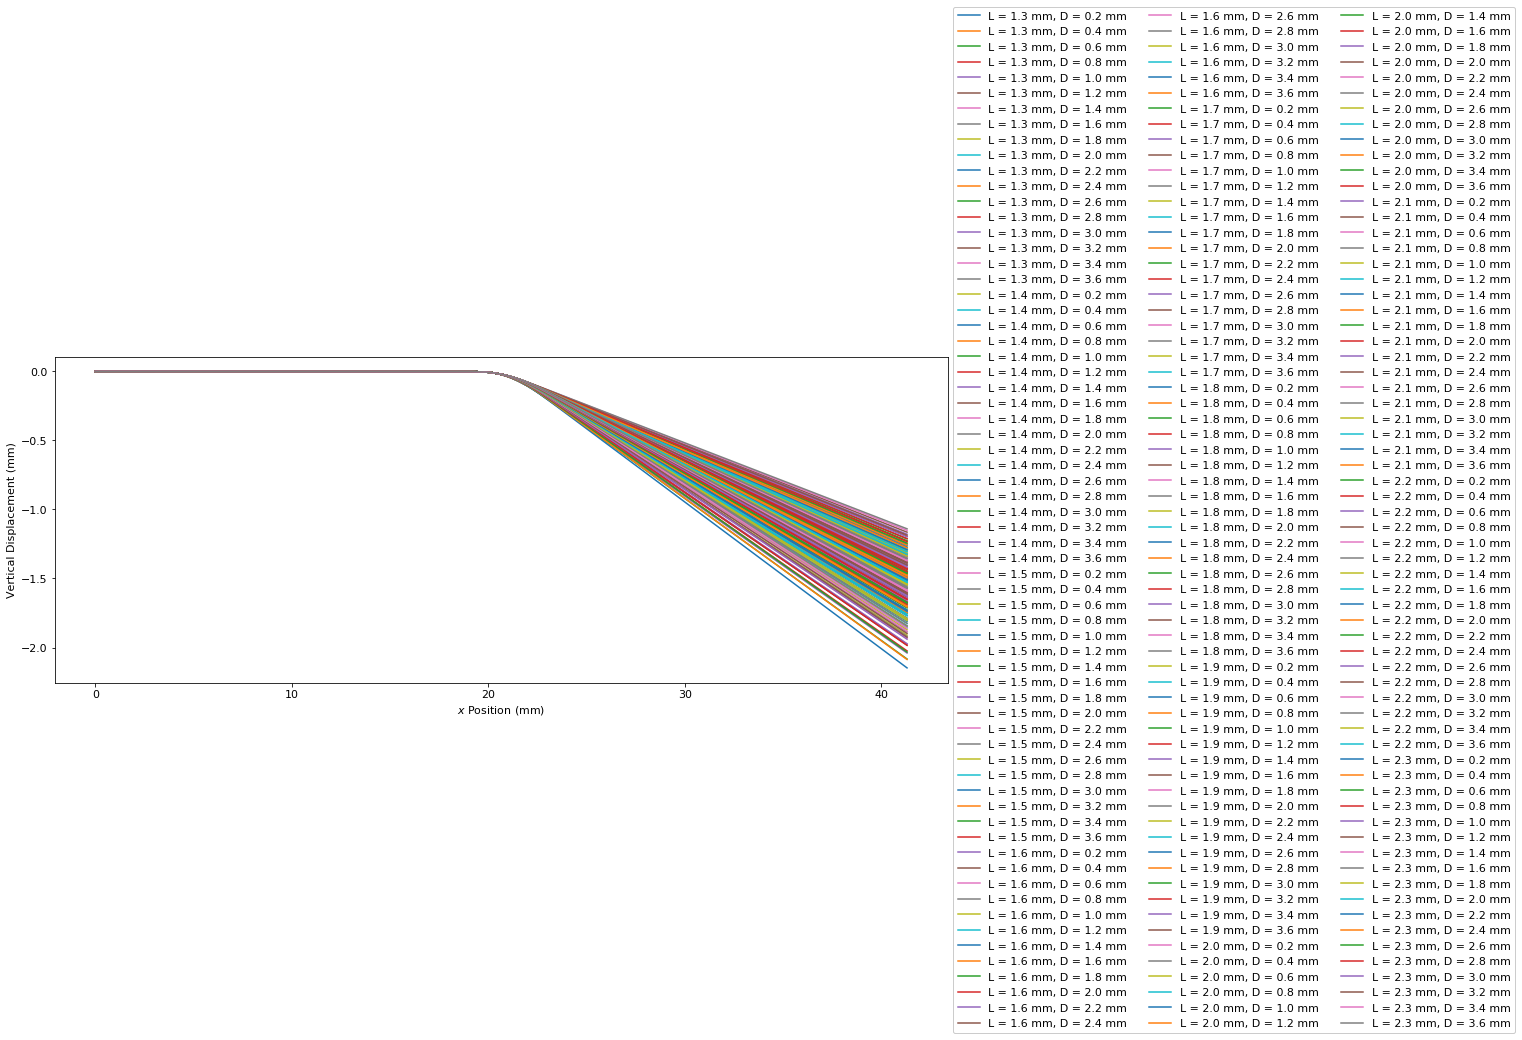

In [6]:
n = df1.shape[1] - 3
gradient = np.zeros(n)
pivot = np.zeros(n)

fig, ax = plt.subplots(1, 1, figsize = (16, 6))
for i in range(n):
    colname = df1.columns[i+3]
    l = float(re.findall(r'L1=(\d\.?\d?)', colname)[0])
    d = float(re.findall(r'd1=(\d\.?\d?)', colname)[0])
    x_lim = 20.0 + l
    df_process = df1[['X (mm)', 'Y (mm)', 'Z (mm)', colname]].copy()
    df_process = df_process[df_process['Z (mm)'] <= 0.8]
    df_process = df_process.drop(columns = ['Y (mm)', 'Z (mm)'])
    df_process = df_process.groupby(['X (mm)']).mean()
    df_process.reset_index(inplace = True)
    coe = np.polyfit(df_process[df_process['X (mm)'] >= x_lim]['X (mm)'], df_process[df_process['X (mm)'] >= x_lim][colname], 1)
    gradient[i] = np.abs(coe[0])
    pivot[i] = -coe[1] / coe[0]
    ax.plot(df_process['X (mm)'], df_process[colname], '-', label = 'L = {:.1f} mm, D = {:.1f} mm'.format(l, d))

ax.set_xlabel(r'$x$ Position (mm)')
ax.set_ylabel('Vertical Displacement (mm)')

ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 3, framealpha = 1)

plt.tight_layout()
plt.show()

In [7]:
df2['X rotation pivot (mm)'] = pivot
df2['Torque (Nm)'] = df2['Applied force (N)'] * (df2['Flexure length (mm)'] + 40.0 - pivot) * 0.001
df2['Deflection angle (°)'] = np.arctan(gradient) * 180.0 / np.pi
df2['1st order stiffness (Nm/°)'] = df2['Torque (Nm)'] / df2['Deflection angle (°)']
df2['Normalised 1st order stress (N/m^2°)'] = df2['Max von Mises stress (N/m^2)'] / df2['Deflection angle (°)']
df2

Flexure length (mm)  Apex separation (mm)  Applied force (N)  \
0                    1.3                   0.2               1.00   
1                    1.3                   0.4               1.00   
2                    1.3                   0.6               1.00   
3                    1.3                   0.8               1.00   
4                    1.3                   1.0               1.00   
..                   ...                   ...                ...   
193                  2.3                   2.8               0.98   
194                  2.3                   3.0               0.98   
195                  2.3                   3.2               0.98   
196                  2.3                   3.4               0.98   
197                  2.3                   3.6               0.98   

     Max von Mises stress (N/m^2)  X rotation pivot (mm)  Torque (Nm)  \
0                    1.547162e+08              20.597420     0.020703   
1                    1.587459e+08              20.596113     0.020704   
2                    1.605562e+08              20.594896     0.020705   
3                    1.588138e+08              20.593736     0.020706   
4                    1.569228e+08              20.592624     0.020707   
..                            ...                    ...          ...   
193                  1.362050e+08              21.069717     0.020806   
194                  1.349217e+08              21.068963     0.020806   
195                  1.334485e+08              21.068265     0.020807   
196                  1.317384e+08              21.067631     0.020808   
197                  1.320481e+08              21.067038     0.020808   

     Deflection angle (°)  1st order stiffness (Nm/°)  \
0                4.266198                    0.004853   
1                4.152203                    0.004986   
2                4.050585                    0.005112   
3                3.957236                    0.005233   
4                3.870634                    0.005350   
..                    ...                         ...   
193              4.662442                    0.004462   
194              4.599073                    0.004524   
195              4.540980                    0.004582   
196              4.488321                    0.004636   
197              4.441358                    0.004685   

     Normalised 1st order stress (N/m^2°)  
0                            3.626559e+07  
1                            3.823173e+07  
2                            3.963778e+07  
3                            4.013252e+07  
4                            4.054188e+07  
..                                    ...  
193                          2.921324e+07  
194                          2.933672e+07  
195                          2.938759e+07  
196                          2.935138e+07  
197                          2.973148e+07  

[198 rows x 9 columns]

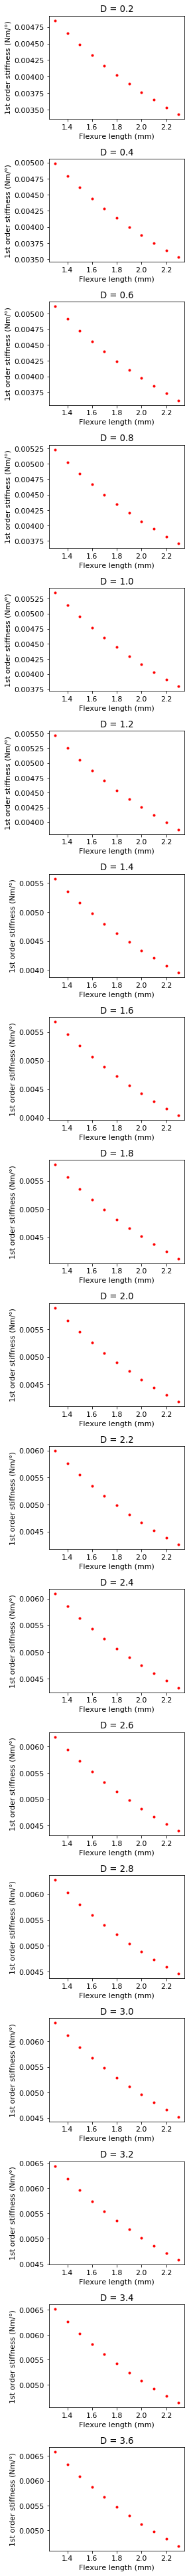

In [8]:
trend_plot(df2, 'l', '1st order stiffness (Nm/°)')

## Second order bending

In [9]:
df3 = pd.read_csv(r'..\Final_data\Second_order_bending\dogbone_filleted_second_order_bending_displacement_final.csv', header = None, skiprows = 9)
column_name = pd.read_csv(r'..\Final_data\Second_order_bending\dogbone_filleted_second_order_bending_displacement_final.csv', header = None, nrows = 1, skiprows = 8)
column_name = np.squeeze(column_name.values)
new_column_name = ['X (mm)', 'Y (mm)', 'Z (mm)']
for i in range(3, np.shape(column_name)[0], 2):
    new_column_name.append(','.join(column_name[i:i+2]))
df3.columns = new_column_name
df3 = df3.round({'X (mm)': 1, 'Y (mm)': 1, 'Z (mm)': 1})
df3.sort_values(by = ['X (mm)', 'Y (mm)', 'Z (mm)'], inplace = True)
df3.reset_index(drop = True, inplace = True)
df3

X (mm)  Y (mm)  Z (mm)  w (mm) @ L1=1.3, d1=0.2  \
0          0.0     0.0     0.0             7.804287e-20   
1          0.0     0.0     0.1             0.000000e+00   
2          0.0     0.0     0.2             0.000000e+00   
3          0.0     0.0     0.3             0.000000e+00   
4          0.0     0.0     0.4             0.000000e+00   
...        ...     ...     ...                      ...   
169735    41.3     4.0     0.5            -1.558812e-01   
169736    41.3     4.0     0.6            -1.549770e-01   
169737    41.3     4.0     0.7            -1.541935e-01   
169738    41.3     4.0     0.8            -1.535308e-01   
169739    41.3     4.0     0.9            -1.530638e-01   

        w (mm) @ L1=1.3, d1=0.4  w (mm) @ L1=1.3, d1=0.6  \
0                 -9.504645e-20            -8.460044e-20   
1                  0.000000e+00             0.000000e+00   
2                  0.000000e+00             0.000000e+00   
3                  0.000000e+00             0.000000e+00   
4                  0.000000e+00             0.000000e+00   
...                         ...                      ...   
169735            -1.553565e-01            -1.548230e-01   
169736            -1.543981e-01            -1.539203e-01   
169737            -1.536110e-01            -1.531810e-01   
169738            -1.529949e-01            -1.526050e-01   
169739            -1.525449e-01            -1.521416e-01   

        w (mm) @ L1=1.3, d1=0.8  w (mm) @ L1=1.3, d1=1  \
0                 -9.443155e-20           1.898289e-19   
1                  0.000000e+00           0.000000e+00   
2                  0.000000e+00           0.000000e+00   
3                  0.000000e+00           0.000000e+00   
4                  0.000000e+00           0.000000e+00   
...                         ...                    ...   
169735            -1.544049e-01          -1.539813e-01   
169736            -1.534880e-01          -1.530615e-01   
169737            -1.527328e-01          -1.523029e-01   
169738            -1.521394e-01          -1.517054e-01   
169739            -1.516857e-01          -1.512493e-01   

        w (mm) @ L1=1.3, d1=1.2  w (mm) @ L1=1.3, d1=1.4  ...  \
0                  1.606292e-20            -1.642385e-19  ...   
1                  0.000000e+00             0.000000e+00  ...   
2                  0.000000e+00             0.000000e+00  ...   
3                  0.000000e+00             0.000000e+00  ...   
4                  0.000000e+00             0.000000e+00  ...   
...                         ...                      ...  ...   
169735            -1.535575e-01            -1.531243e-01  ...   
169736            -1.526373e-01            -1.522077e-01  ...   
169737            -1.518799e-01            -1.514531e-01  ...   
169738            -1.512852e-01            -1.508603e-01  ...   
169739            -1.508378e-01            -1.504031e-01  ...   

        w (mm) @ L1=2.3, d1=1.8  w (mm) @ L1=2.3, d1=2  \
0                      0.000000               0.000000   
1                      0.000000               0.000000   
2                      0.000000               0.000000   
3                      0.000000               0.000000   
4                      0.000000               0.000000   
...                         ...                    ...   
169735                -0.249214              -0.248084   
169736                -0.249254              -0.248110   
169737                -0.249257              -0.248097   
169738                -0.249247              -0.248074   
169739                -0.249224              -0.248042   

        w (mm) @ L1=2.3, d1=2.2  w (mm) @ L1=2.3, d1=2.4  \
0                 -7.535977e-20             7.534809e-20   
1                  0.000000e+00             0.000000e+00   
2                  0.000000e+00             0.000000e+00   
3                  0.000000e+00             0.000000e+00   
4                  0.000000e+00             0.000000e+00   
...                         ...            

In [10]:
df4 = pd.read_csv(r'..\Final_data\Second_order_bending\dogbone_filleted_second_order_bending_stress_final.csv', skiprows = 4)
df4.rename(columns = {'% Flexure length (mm)': 'Flexure length (mm)'}, inplace = True)
df4['Applied force (N)'] = np.full(df4.shape[0], 35.0).round(1)
df4 = df4.round({'Flexure length (mm)': 1, 'Apex separation (mm)': 1, 'Applied force (N)': 1})
df4

Flexure length (mm)  Apex separation (mm)  Max von Mises stress (N/m^2)  \
0                    1.3                   0.2                  2.104768e+08   
1                    1.3                   0.4                  2.112713e+08   
2                    1.3                   0.6                  2.108921e+08   
3                    1.3                   0.8                  2.120490e+08   
4                    1.3                   1.0                  2.083503e+08   
..                   ...                   ...                           ...   
193                  2.3                   2.8                  2.962120e+08   
194                  2.3                   3.0                  2.943455e+08   
195                  2.3                   3.2                  2.907867e+08   
196                  2.3                   3.4                  2.891291e+08   
197                  2.3                   3.6                  2.885607e+08   

     Applied force (N)  
0                 35.0  
1                 35.0  
2                 35.0  
3                 35.0  
4                 35.0  
..                 ...  
193               35.0  
194               35.0  
195               35.0  
196               35.0  
197               35.0  

[198 rows x 4 columns]

<ipython-input-11-16b5e13a7282>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


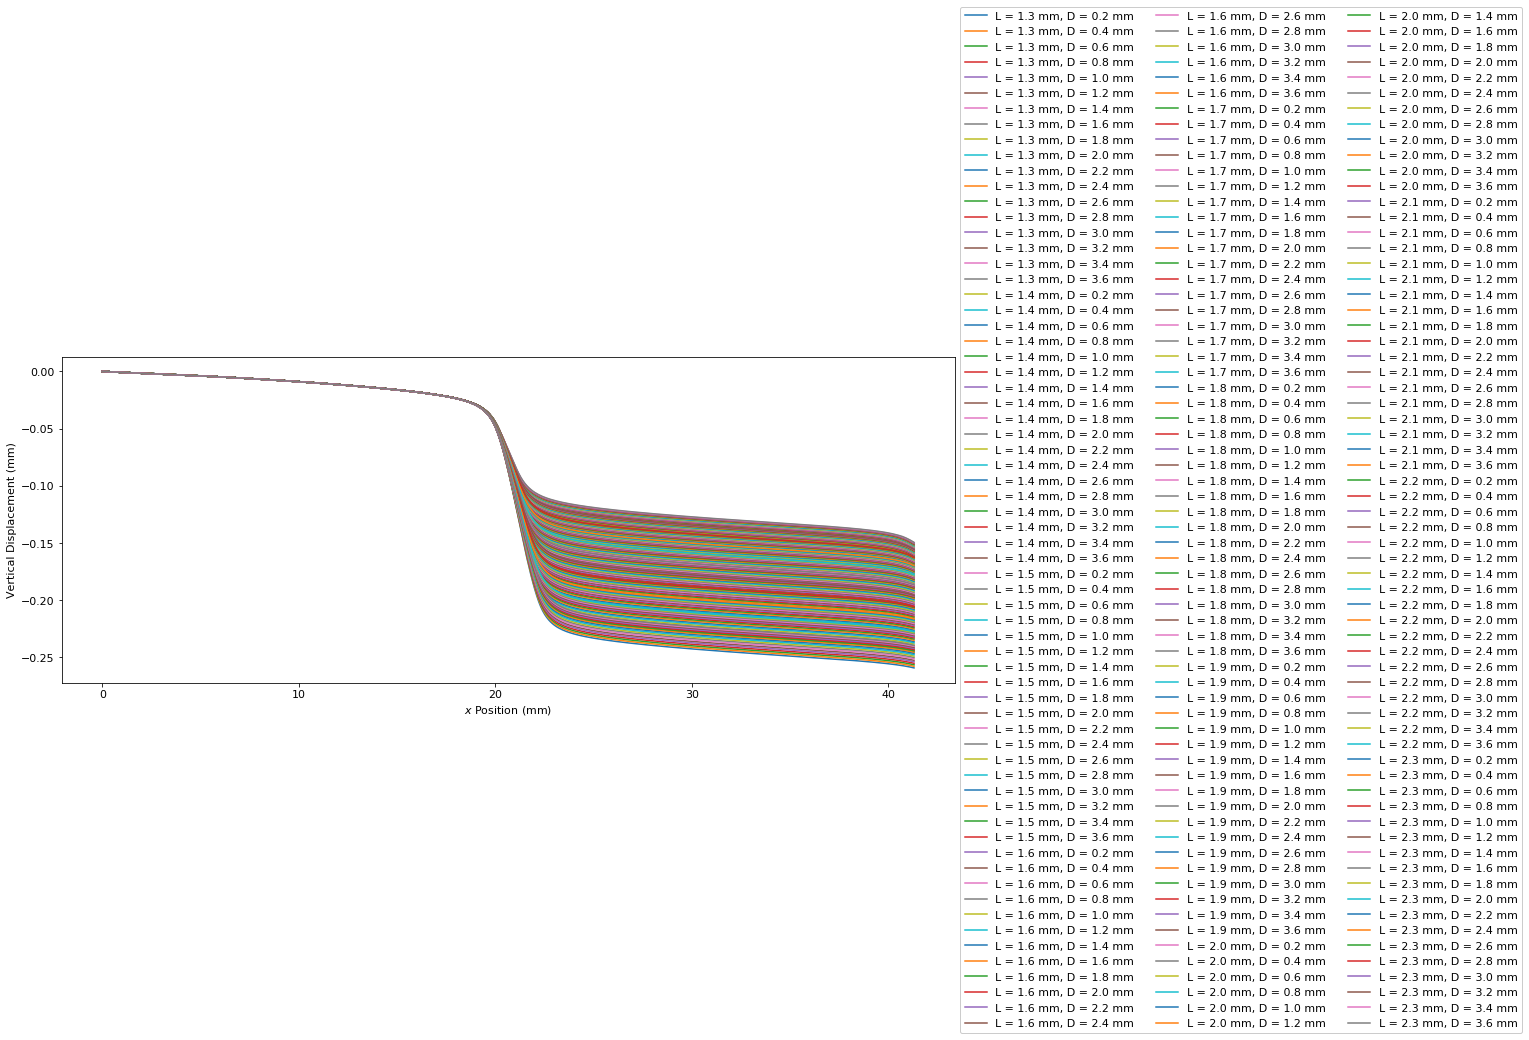

In [11]:
n = df3.shape[1] - 3
displacement = np.zeros(n)

fig, ax = plt.subplots(1, 1, figsize = (16, 6))
for i in range(n):
    colname = df3.columns[i+3]
    l = float(re.findall(r'L1=(\d\.?\d?)', colname)[0])
    d = float(re.findall(r'd1=(\d\.?\d?)', colname)[0])
    x_lim = math.ceil(10.0 * (20.0 + l)) / 10.0
    df_process = df3[['X (mm)', 'Y (mm)', 'Z (mm)', colname]].copy()
    df_process = df_process[df_process['Z (mm)'] <= 0.8]
    df_process = df_process.drop(columns = ['Y (mm)', 'Z (mm)'])
    df_process = df_process.groupby(['X (mm)']).mean()
    df_process.reset_index(inplace = True)
    displacement[i] = (df_process[df_process['X (mm)'] == 20.0][colname].values[0] - df_process[df_process['X (mm)'] == x_lim][colname].values[0]) * 0.001
    ax.plot(df_process['X (mm)'], df_process[colname], '-', label = 'L = {:.1f} mm, D = {:.1f} mm'.format(l, d))

ax.set_xlabel(r'$x$ Position (mm)')
ax.set_ylabel('Vertical Displacement (mm)')

ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 3, framealpha = 1)

plt.tight_layout()
plt.show()

In [12]:
df4['Displacement (m)'] = displacement
df4['2nd order stiffness (N/m)'] = df4['Applied force (N)'] / df4['Displacement (m)']
df4['Normalised 2nd order stress (N/m^3)'] = df4['Max von Mises stress (N/m^2)'] / df4['Displacement (m)']
df4

Flexure length (mm)  Apex separation (mm)  Max von Mises stress (N/m^2)  \
0                    1.3                   0.2                  2.104768e+08   
1                    1.3                   0.4                  2.112713e+08   
2                    1.3                   0.6                  2.108921e+08   
3                    1.3                   0.8                  2.120490e+08   
4                    1.3                   1.0                  2.083503e+08   
..                   ...                   ...                           ...   
193                  2.3                   2.8                  2.962120e+08   
194                  2.3                   3.0                  2.943455e+08   
195                  2.3                   3.2                  2.907867e+08   
196                  2.3                   3.4                  2.891291e+08   
197                  2.3                   3.6                  2.885607e+08   

     Applied force (N)  Displacement (m)  2nd order stiffness (N/m)  \
0                 35.0          0.000055              636251.794142   
1                 35.0          0.000055              641247.223903   
2                 35.0          0.000054              646239.838808   
3                 35.0          0.000054              651255.513748   
4                 35.0          0.000053              656289.285605   
..                 ...               ...                        ...   
193               35.0          0.000141              248696.451652   
194               35.0          0.000140              250552.171848   
195               35.0          0.000139              252318.131196   
196               35.0          0.000138              253955.887170   
197               35.0          0.000137              255406.502150   

     Normalised 2nd order stress (N/m^3)  
0                           3.826178e+12  
1                           3.870776e+12  
2                           3.893910e+12  
3                           3.945660e+12  
4                           3.906802e+12  
..                                   ...  
193                         2.104768e+12  
194                         2.107111e+12  
195                         2.096307e+12  
196                         2.097887e+12  
197                         2.105722e+12  

[198 rows x 7 columns]

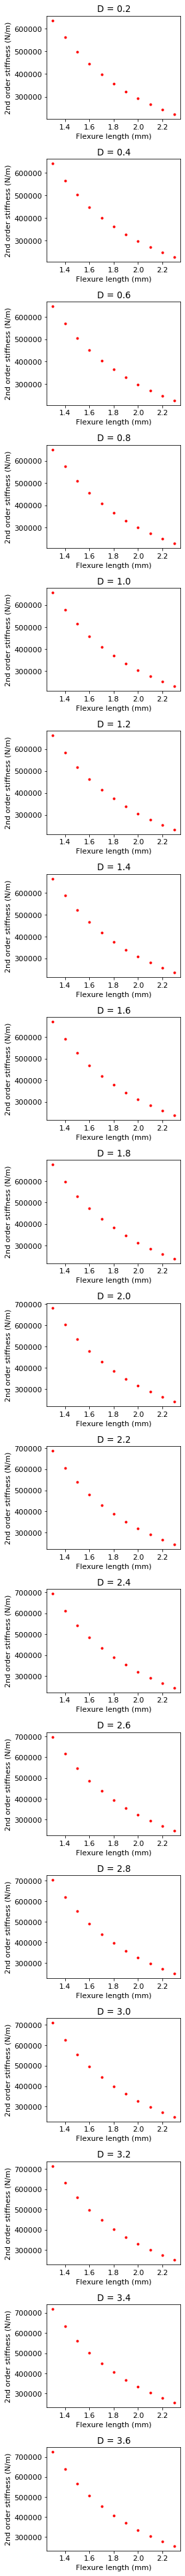

In [13]:
trend_plot(df4, 'l', '2nd order stiffness (N/m)')

## Performance characterisation

In [14]:
df5 = df2[['Flexure length (mm)', 'Apex separation (mm)', 'X rotation pivot (mm)', 'Deflection angle (°)', '1st order stiffness (Nm/°)', 'Normalised 1st order stress (N/m^2°)']].copy()
df5['1st order max stress (N/m^2)'] = df2['Max von Mises stress (N/m^2)']
df5['Displacement (m)'] = df4['Displacement (m)']
df5['2nd order stiffness (N/m)'] = df4['2nd order stiffness (N/m)']
df5['2nd order max stress (N/m^2)'] = df4['Max von Mises stress (N/m^2)']
df5

Flexure length (mm)  Apex separation (mm)  X rotation pivot (mm)  \
0                    1.3                   0.2              20.597420   
1                    1.3                   0.4              20.596113   
2                    1.3                   0.6              20.594896   
3                    1.3                   0.8              20.593736   
4                    1.3                   1.0              20.592624   
..                   ...                   ...                    ...   
193                  2.3                   2.8              21.069717   
194                  2.3                   3.0              21.068963   
195                  2.3                   3.2              21.068265   
196                  2.3                   3.4              21.067631   
197                  2.3                   3.6              21.067038   

     Deflection angle (°)  1st order stiffness (Nm/°)  \
0                4.266198                    0.004853   
1                4.152203                    0.004986   
2                4.050585                    0.005112   
3                3.957236                    0.005233   
4                3.870634                    0.005350   
..                    ...                         ...   
193              4.662442                    0.004462   
194              4.599073                    0.004524   
195              4.540980                    0.004582   
196              4.488321                    0.004636   
197              4.441358                    0.004685   

     Normalised 1st order stress (N/m^2°)  1st order max stress (N/m^2)  \
0                            3.626559e+07                  1.547162e+08   
1                            3.823173e+07                  1.587459e+08   
2                            3.963778e+07                  1.605562e+08   
3                            4.013252e+07                  1.588138e+08   
4                            4.054188e+07                  1.569228e+08   
..                                    ...                           ...   
193                          2.921324e+07                  1.362050e+08   
194                          2.933672e+07                  1.349217e+08   
195                          2.938759e+07                  1.334485e+08   
196                          2.935138e+07                  1.317384e+08   
197                          2.973148e+07                  1.320481e+08   

     Displacement (m)  2nd order stiffness (N/m)  2nd order max stress (N/m^2)  
0            0.000055              636251.794142                  2.104768e+08  
1            0.000055              641247.223903                  2.112713e+08  
2            0.000054              646239.838808                  2.108921e+08  
3            0.000054              651255.513748                  2.120490e+08  
4            0.000053              656289.285605                  2.083503e+08  
..                ...                        ...                           ...  
193          0.000141              248696.451652                  2.962120e+08  
194          0.000140              250552.171848                  2.943455e+08  
195          0.000139              252318.131196                  2.907867e+08  
196          0.000138              253955.887170                  2.891291e+08  
197          0.000137              255406.502150                  2.885607e+08  

[198 rows x 10 columns]

In [15]:
df5['Parameter1'] = df5['2nd order stiffness (N/m)'] / df5['1st order stiffness (Nm/°)']
df5['Parameter2'] = df5['1st order max stress (N/m^2)'] / (df5['1st order stiffness (Nm/°)'] * df5['Deflection angle (°)'])
df5['Parameter3'] = df5['2nd order max stress (N/m^2)'] / (df5['2nd order stiffness (N/m)'] * df5['Displacement (m)'])
df5['Dimensionless'] = (df5['2nd order stiffness (N/m)'] / df5['1st order stiffness (Nm/°)']) * ((40.0 + df5['Flexure length (mm)'] - df5['X rotation pivot (mm)']) * 0.001)**2
df5

Flexure length (mm)  Apex separation (mm)  X rotation pivot (mm)  \
0                    1.3                   0.2              20.597420   
1                    1.3                   0.4              20.596113   
2                    1.3                   0.6              20.594896   
3                    1.3                   0.8              20.593736   
4                    1.3                   1.0              20.592624   
..                   ...                   ...                    ...   
193                  2.3                   2.8              21.069717   
194                  2.3                   3.0              21.068963   
195                  2.3                   3.2              21.068265   
196                  2.3                   3.4              21.067631   
197                  2.3                   3.6              21.067038   

     Deflection angle (°)  1st order stiffness (Nm/°)  \
0                4.266198                    0.004853   
1                4.152203                    0.004986   
2                4.050585                    0.005112   
3                3.957236                    0.005233   
4                3.870634                    0.005350   
..                    ...                         ...   
193              4.662442                    0.004462   
194              4.599073                    0.004524   
195              4.540980                    0.004582   
196              4.488321                    0.004636   
197              4.441358                    0.004685   

     Normalised 1st order stress (N/m^2°)  1st order max stress (N/m^2)  \
0                            3.626559e+07                  1.547162e+08   
1                            3.823173e+07                  1.587459e+08   
2                            3.963778e+07                  1.605562e+08   
3                            4.013252e+07                  1.588138e+08   
4                            4.054188e+07                  1.569228e+08   
..                                    ...                           ...   
193                          2.921324e+07                  1.362050e+08   
194                          2.933672e+07                  1.349217e+08   
195                          2.938759e+07                  1.334485e+08   
196                          2.935138e+07                  1.317384e+08   
197                          2.973148e+07                  1.320481e+08   

     Displacement (m)  2nd order stiffness (N/m)  \
0            0.000055              636251.794142   
1            0.000055              641247.223903   
2            0.000054              646239.838808   
3            0.000054              651255.513748   
4            0.000053              656289.285605   
..                ...                        ...   
193          0.000141              248696.451652   
194          0.000140              250552.171848   
195          0.000139              252318.131196   
196          0.000138              253955.887170   
197          0.000137              255406.502150   

     2nd order max stress (N/m^2)    Parameter1    Parameter2    Parameter3  \
0                    2.104768e+08  1.311129e+08  7.473279e+09  6.013623e+06   
1                    2.112713e+08  1.286033e+08  7.667444e+09  6.036324e+06   
2                    2.108921e+08  1.264253e+08  7.754427e+09  6.025488e+06   
3                    2.120490e+08  1.244634e+08  7.669846e+09  6.058543e+06   
4                    2.083503e+08  1.226740e+08  7.578112e+09  5.952866e+06   
..                            ...           ...           ...           ...   
193                  2.962120e+08  5.573156e+07  6.546532e+09  8.463199e+06   
194                  2.943455e+08  5.538233e+07  6.484620e+09  8.409871e+06   
195                  2.907867e+08  5.506637e+07  6.413602e+09  8.308192e+06   
196                  2.891291e+08  5.477944e+07  6.331227e+09  8.260831e+06   
197                  2.885607e+08  5.451438e+07 

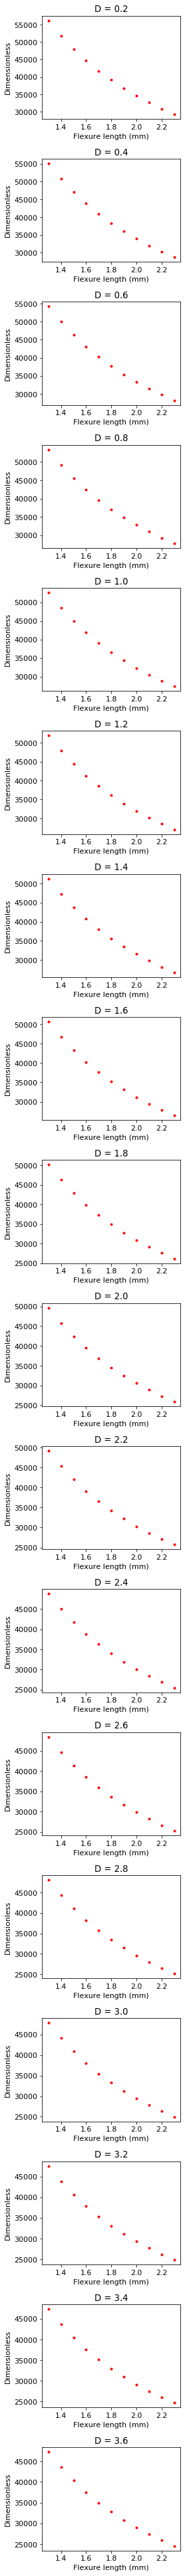

In [16]:
trend_plot(df5, 'l', 'Dimensionless')

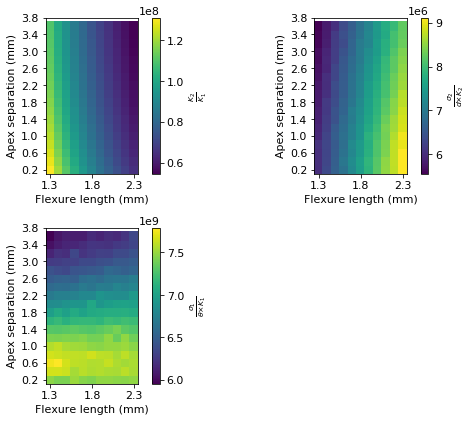

In [17]:
l = df5['Flexure length (mm)'].unique()
ln = np.shape(l)[0]
l = np.append(l, [l[-1] + (l[1] - l[0])]) - ((l[1] - l[0]) / 2.0)
d = df5['Apex separation (mm)'].unique()
dn = np.shape(d)[0]
d = np.append(d, [d[-1] + (d[1] - d[0])]) - ((d[1] - d[0]) / 2.0)

fig, ax = plt.subplots(2, 2, figsize = (8, 6))
ax[1, 1].remove()

ax[0, 0].set_xlabel('Flexure length (mm)')
ax[0, 0].set_ylabel('Apex separation (mm)')
ax[1, 0].set_xlabel('Flexure length (mm)')
ax[1, 0].set_ylabel('Apex separation (mm)')
ax[0, 1].set_xlabel('Flexure length (mm)')
ax[0, 1].set_ylabel('Apex separation (mm)')

z = df5['Parameter1'].values.reshape((ln, dn))
z = z.transpose()
graph = ax[0, 0].pcolormesh(l, d, z, vmin = df5['Parameter1'].min(), vmax = df5['Parameter1'].max())
cbar = fig.colorbar(graph, ax = ax[0, 0])
cbar.ax.set_ylabel(r'$\frac{K_2}{K_1}$')
cbar.ax.ticklabel_format(scilimits = (0, 0))
z = df5['Parameter2'].values.reshape((ln, dn))
z = z.transpose()
graph = ax[1, 0].pcolormesh(l, d, z, vmin = df5['Parameter2'].min(), vmax = df5['Parameter2'].max())
cbar = fig.colorbar(graph, ax = ax[1, 0])
cbar.ax.set_ylabel(r'$\frac{\sigma_1}{{\theta}{\times}{K_1}}$')
cbar.ax.ticklabel_format(scilimits = (0, 0))
z = df5['Parameter3'].values.reshape((ln, dn))
z = z.transpose()
graph = ax[0, 1].pcolormesh(l, d, z, vmin = df5['Parameter3'].min(), vmax = df5['Parameter3'].max())
cbar = fig.colorbar(graph, ax = ax[0, 1])
cbar.ax.set_ylabel(r'$\frac{\sigma_2}{{d}{\times}{K_2}}$')
cbar.ax.ticklabel_format(scilimits = (0, 0))

ax[0, 0].set_xticks(np.arange(df5['Flexure length (mm)'].min(), df5['Flexure length (mm)'].max() + 0.5, 0.5))
ax[0, 0].set_yticks(np.arange(df5['Apex separation (mm)'].min(), df5['Apex separation (mm)'].max() + 0.4, 0.4))
ax[1, 0].set_xticks(np.arange(df5['Flexure length (mm)'].min(), df5['Flexure length (mm)'].max() + 0.5, 0.5))
ax[1, 0].set_yticks(np.arange(df5['Apex separation (mm)'].min(), df5['Apex separation (mm)'].max() + 0.4, 0.4))
ax[0, 1].set_xticks(np.arange(df5['Flexure length (mm)'].min(), df5['Flexure length (mm)'].max() + 0.5, 0.5))
ax[0, 1].set_yticks(np.arange(df5['Apex separation (mm)'].min(), df5['Apex separation (mm)'].max() + 0.4, 0.4))

ax[0, 0].set_aspect(0.5)
ax[1, 0].set_aspect(0.5)
ax[0, 1].set_aspect(0.5)

plt.tight_layout()
plt.subplots_adjust(wspace = 0)
plt.show()

In [18]:
df6 = df2[['Flexure length (mm)', 'Apex separation (mm)', 'Deflection angle (°)', '1st order stiffness (Nm/°)', 'Normalised 1st order stress (N/m^2°)']].copy()
df6['1st order max stress (N/m^2)'] = df2['Max von Mises stress (N/m^2)']
df6['2nd order stiffness (N/m)'] = df4['2nd order stiffness (N/m)']
df6['2nd order max stress (N/m^2)'] = df4['Max von Mises stress (N/m^2)']
df6['Stiffness ratio'] = df5['Dimensionless']
df6.to_csv('dogbone_final.csv', index = False)